Задача классификации. Логистическая регрессия. Проблема переобучения. Регуляризация

##univariate linear regression


In [194]:
import numpy as np
import math 
import scipy.optimize as opt
import sys


class classification:
  def __init__(self,data,classes,norm=False):
    self.data=data
    self.matrix_dimension=len(data.columns)
    self.data=data.copy()
    if norm:
      self.__normaliation()

    self.classes=classes
  
  def __normaliation(self):
    for colum in list(self.data.columns):
      self.data[colum]=(self.data[colum]-self.data[colum].mean())/self.data[colum].std()

  def drawGraph(self,x_size=7,y_size=5,soluthion=False):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(x_size, y_size))

    data0=self.data.loc[self.data[self.data.columns[2]] == 0] 
    data1=self.data.loc[self.data[self.data.columns[2]] == 1]

    plt.plot(data0[data0.columns[0]],
             data0[data0.columns[1]],
             label = self.classes[0],color="r" ,marker='x',linestyle='none')
    
    plt.plot(data1[data1.columns[0]],
             data1[data1.columns[1]],
             label = self.classes[1],color="b" ,marker='o',linestyle='none')
    
    if soluthion:

                                                #self.getPredict(self.data[self.data.columns[1]])
      plt.plot(self.data[self.data.columns[1]], -(self.theta[0]+self.theta[1]*self.data[self.data.columns[1]])/self.theta[2],
               color="y",label ="{}+{}x+{}y=0".format(round(self.theta[0],8),round(self.theta[1],8),round(self.theta[2],8))  ) 
    

    plt.xlabel(self.data.columns[0]), plt.ylabel(self.data.columns[1])

    plt.legend()
    plt.show()


  def getPredict(self,*nums):
    if len(nums)>self.matrix_dimension-1: #-(self.theta[0]+self.theta[1]*self.data[self.data.columns[1]])/self.theta[2]
      print('too many options')
      sys.exit()
    result=self.theta[0]

    for i in range(len(nums)):
      result+=nums[i]*self.theta[i+1]


    result[result >=0] = 1
    result[result <0] =0

    return result

  def get_tranclation_predict(self,*nums):
    result=self.getPredict(*nums)
    return [self.classes[int(i)] for i in result]

  def getVectors(self):
    self.X = np.array(self.data[self.data.columns[:-1]])
    ones_vector = np.ones((len(self.X),1))
    self.X=np.hstack((ones_vector,self.X))
    self.Y = np.array(self.data[self.data.columns[-1:]])
    self.theta=np.resize(np.array([0 for _ in range(self.matrix_dimension)]),(self.matrix_dimension,1))
    return self.X,self.Y,self.theta
  
  def sigmoid(self,z):
      return 1/(1+np.exp(-z))
  
  def computeCost(self,theta,X,y):
      hThetaX = self.sigmoid(np.dot(X, theta))
      y=np.resize(y,(1,len(y)))[0]
      J = - (np.dot(y, np.log(hThetaX)) + np.dot((1 - y), np.log(1 - hThetaX))) / len(y)
      return J

  def oldGradientDescent(self):
    self.J_iters=[]
    for iter in range(self.iters):
      self.J_iters.append(self.__computeCost(self.X, self.Y))
      self.theta=self.theta-((self.alpha/len(y))*self.X.transpose()).dot((self.X.dot(self.theta)-self.Y))
    return self.theta

  # Приозводная целевой функции J'(theta)
  def gradientFunc(self,theta,X, y):
    #from sympy import diff,cos,symbols,exp

    
    hThetaX = self.sigmoid(np.dot(X, theta))
    gradient =  np.dot(X.T, (hThetaX - y)) / len(y)
    
    return gradient

  def gradientDescent(self,theta,X, y):
    y=np.resize(y,(1,len(y)))[0]
    result = opt.fmin_tnc(func = self.computeCost,            #метода Ньютона сопряженных градиентов
                          x0 = theta, fprime = self.gradientFunc,
                          args = (X, y))    
    theta_optimized = result[0]
    print(theta_optimized)
    self.theta=theta_optimized


  def accuracy(self):
    test_y=self.getPredict(self.data[self.data.columns[0]],self.data[self.data.columns[1]])
    train_y=np.resize(self.Y,(1,len(self.Y)))[0]
    accuracy=0
    for i in range(len(train_y)):
      accuracy+=abs(test_y[i]-train_y[i])
    accuracy=(1-accuracy/len(train_y))*100
    return accuracy








  def grapdooooientFunc(self,theta,X, y):
    #self.J_iters=[]
    
    result = opt.fmin_tnc(func = self.com9puteCost,
                          x0 = self.theta, fprime = self.gradientFunc,
                          args = (X, y))
    theta_optimized = result[0]
    print(theta_optimized)
    return self.theta


   

In [186]:
import pandas as pd
data_exam = pd.read_csv("ex2data1.txt", header=None)
data_exam.column=['Exam1_score','Exam2_score','res']
data_exam.head(5)

C:\Users\nasta\AppData\Local\Temp\ipykernel_5876\2372403090.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_exam.column=['Exam1_score','Exam2_score','res']


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


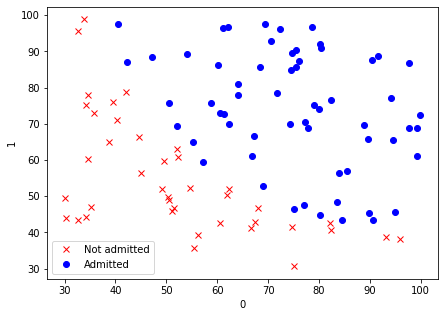

F(theta)=0.6931471805599453
F'(theta)=([[ -0.1       ]
 [-12.00921659]
 [-11.26284221]],)
[-25.16131846   0.20623159   0.20147148]


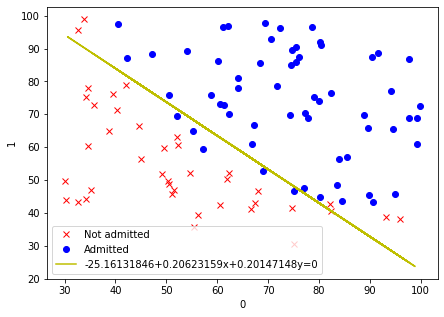

student with points 45 and 85 was ['Admitted'] in university


89.0

In [195]:
predict=classification(data_exam,classes=["Not admitted","Admitted"])

X,Y,theta=predict.getVectors()
predict.drawGraph()
print('F(theta)={}'.format(predict.computeCost(theta,X, Y)[0]))
print("F'(theta)=({},)".format(predict.gradientFunc(theta,X, Y)))
#predict.gradientFunc(theta,X, Y)
predict.gradientDescent(theta,X, Y)
predict.drawGraph(soluthion=True)

x1,x2=45,85
print('student with points {} and {} was {} in university'.format(x1,x2,predict.get_tranclation_predict(np.array([x1]),np.array([x2]))))
predict.accuracy()
#print('student with points {} and {} was {} in university'.format(x1,x2,predict.getPredict(x1,x2)))

Получили границу решения, разделяющие классы

In [ ]:
benefits_linear_regression=predict.getPredict(10)
print('Predicting the benefits of opening a restaurant in a city of 10 million {}'.format(benefits_linear_regression))

In [ ]:
Постройте границу решения. Что получилось?
Для студента, сдавшего экзамены на 45 и 85 баллов, оцените вероятность
поступления.
Оцените точность классификатора. Каков процент его правильных ответов?

In [ ]:
Дальше мы могли бы взять функцию gradientDescent(X, y, theta, alpha, iters),
реализующую метод градиентного спуска из прошлой лабораторной работы. Почему?
Мы не будем этого делать, т.к. чистый метод градиентного спуска, реализованный в ней,
работает медленно и практически уже не используется. Давайте воспользуемся его
модификацией - готовой реализацией метода Ньютона сопряженных градиентов из пакета
Scipy. Добавим импорт